# XML gaze data to pandas data and figures

In [1]:
#additional helpful source:
#http://docs.python-guide.org/en/latest/scenarios/xml/

import xmltodict
import pandas as pd
import time

In [2]:
## Test
# start = time.time()
# koe = xml_to_dict('data_1_24_2018_11_25_05_AM_corrected.xml')
# end = time.time()
# print(end - start), ' seconds'

## Functions

### Import XML to dict

In [3]:
def xml_to_dict(filepath):
    with open(filepath) as fd:
        myxml = xmltodict.parse(fd.read())
    
    return myxml

### Dict to pandas

In [4]:
'''Read attributes to pandas format'''
def read_to_pandas(myxml, session):
   

    hx = [i['@GazePointUnity'][1:-2].split(",")[0] for i in myxml['Data']['GazePointCombined']]
    hy = [i['@GazePointUnity'][1:-2].split(",")[1] for i in myxml['Data']['GazePointCombined']]
    hz = [i['@GazePointUnity'][1:-2].split(",")[2] for i in myxml['Data']['GazePointCombined']]
    hs = [i['@stage'] for i in myxml['Data']['StageType']] 
    ht = [i['@type'] for i in myxml['Data']['StageType']] 
    hse = [session for i in myxml['Data']['StageType']]

    mylist = zip (hx, hy, hz, hs, ht, hse)
    
    return pd.DataFrame(mylist, columns=['gpu_x','gpu_y','gpu_z','stage','type', 'session'])
    

## Define and read two XML files to one pandas dataframe

In [5]:
# Define paths
filea = '../../ETRAdata/FixedETRAdata/data_1_24_2018_1_11_41_PM.xml'
fileb = '../../ETRAdata/FixedETRAdata/data_1_24_2018_1_18_25_PM.xml'

start = time.time() # start timer

dfa = read_to_pandas(xml_to_dict(filea), 1) #read file a
dfb = read_to_pandas(xml_to_dict(fileb), 2) #read file a
df = pd.concat([dfa, dfb]) #combine dataframes

end = time.time()
print(end - start), ' seconds'

21.9609999657  seconds


#### Checks

In [6]:
df.head(2)

,gpu_x,gpu_y,gpu_z,stage,type,session
0,0000.00000000,0000.00000000,-0000.7800000,0,2,1
1,0000.00000000,0000.00000000,-0000.7800000,0,2,1


In [7]:
df.tail(2)

,gpu_x,gpu_y,gpu_z,stage,type,session
29874,0015.06604000,-0023.37619000,-0055.7039800,4,2,2
29875,0013.38861000,-0020.97375000,-0046.6840800,4,2,2


In [8]:
dfa.head(2)

,gpu_x,gpu_y,gpu_z,stage,type,session
0,0000.00000000,0000.00000000,-0000.7800000,0,2,1
1,0000.00000000,0000.00000000,-0000.7800000,0,2,1


In [9]:
dfb.head(2)

,gpu_x,gpu_y,gpu_z,stage,type,session
0,0000.00000000,0000.00000000,-0000.7800000,0,2,2
1,0000.00000000,0000.00000000,-0000.7800000,0,2,2


In [10]:
dfa.tail(2)

,gpu_x,gpu_y,gpu_z,stage,type,session
30050,0000.65789940,0000.80435240,-0022.5984800,4,2,1
30051,0000.51535710,0000.72171380,-0022.5973200,4,2,1


In [11]:
dfb.tail(2)

,gpu_x,gpu_y,gpu_z,stage,type,session
29874,0015.06604000,-0023.37619000,-0055.7039800,4,2,2
29875,0013.38861000,-0020.97375000,-0046.6840800,4,2,2


In [12]:
'''Check the length and data format'''
len(dfa), len(dfb), len(df), type(df.gpu_x[0])

(30052, 29876, 59928, pandas.core.series.Series)

## Data massage

In [13]:
'''Remove extra white space and cpnvert to float format'''
cols = ['gpu_x', 'gpu_y', 'gpu_z', 'stage', 'type', 'session']
df[cols] = df[cols].replace(' ','').astype(float)

In [14]:
'''Normed z value: inverse of (min-max scaling + .1)
.1 added to avoid 0'''
norm = lambda x: 1/(((x - x.min()) / (x.max()-x.min()))+.1)
df['gpu_nz'] = df['gpu_z'].transform(norm)

In [15]:
# Check
df['gpu_nz'].min(), df['gpu_nz'].max()

(0.90909090909090906, 10.0)

## Figures

In [16]:
import seaborn as sns
sns.set(style="white", color_codes=True)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

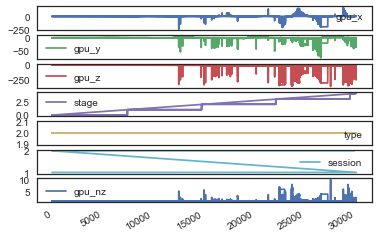

In [17]:
'''Just out of curiosity'''
df.plot(subplots=True);

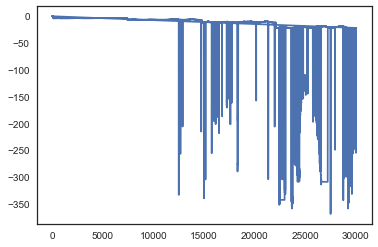

In [18]:
%matplotlib inline
df.gpu_z.plot();

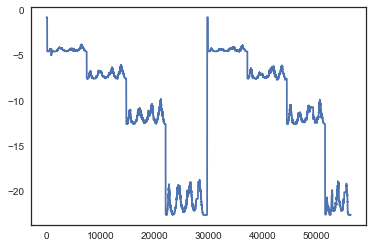

In [19]:
%matplotlib inline
df[df.gpu_z>-25].gpu_z.reset_index(drop=True).plot();

In [20]:
len(df[df.gpu_z<-25])/float(len(df)), len(df[df.gpu_z<-25])

(0.059371245494593515, 3558)

### Plot x and y

In [21]:
#import seaborn as sns
import matplotlib.cm as cm

#### Stage 0, Sessions 1 and 2

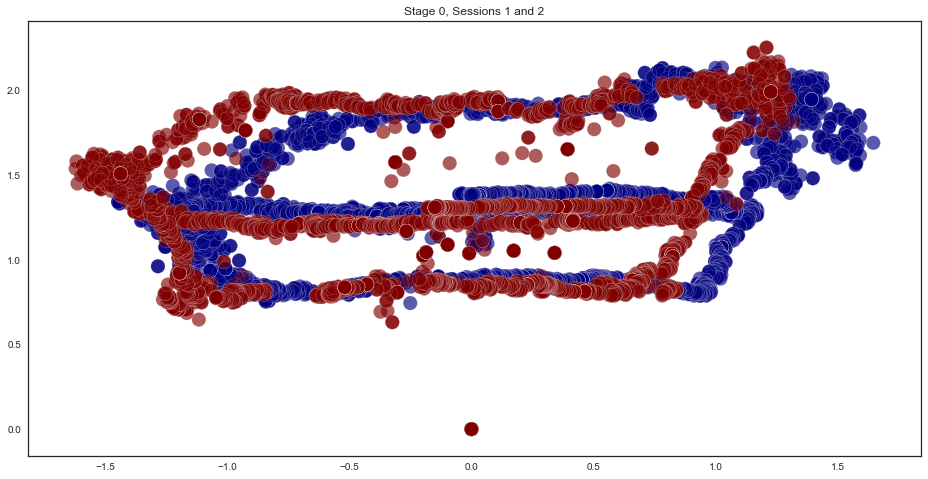

In [22]:
data = df[df.stage==0]
myzip = df.session.unique()
colors = ("green", "blue", 'red')
 
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
 
for dat, color in zip(myzip, colors):
    x = data['gpu_x']
    y = data['gpu_y']
    ax.scatter(x, y, alpha=0.4, c=data['session'], edgecolors='w', s=200, cmap='jet')
 
plt.title('Stage 0, Sessions 1 and 2');
# plt.legend(loc=1)
#plt.savefig('all_in_one.png', format='png', dpi=300);

#### Stage 3, Sessions 1 and 2

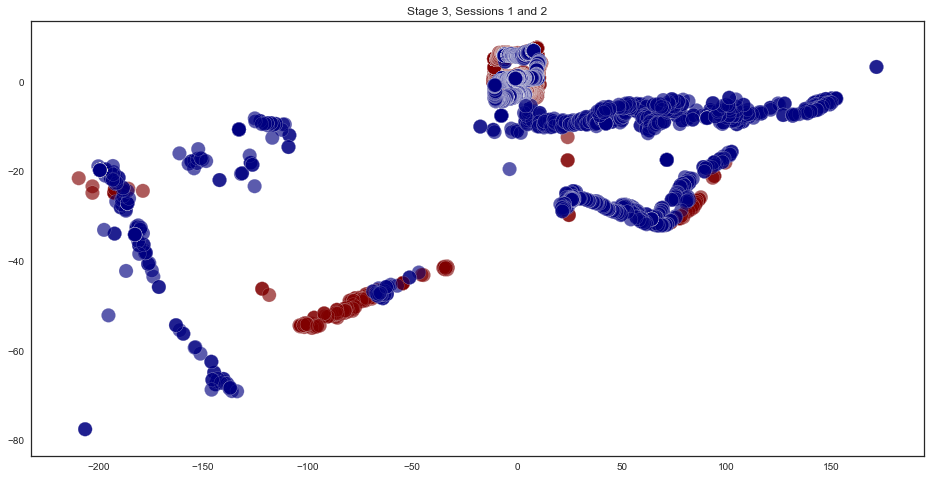

In [23]:
data = df[df.stage==3]
myzip = df.session.unique()
colors = ("green", "blue", 'red')
 
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
 
for dat, color in zip(myzip, colors):
    x = data['gpu_x']
    y = data['gpu_y']
    ax.scatter(x, y, alpha=0.4, c=data['session'], edgecolors='w', s=200, cmap='jet_r')
 
plt.title('Stage 3, Sessions 1 and 2');
# plt.legend(loc=1)
#plt.savefig('all_in_one.png', format='png', dpi=300);

#### Stage 3, Sessions 1 and 2, Outliers removed

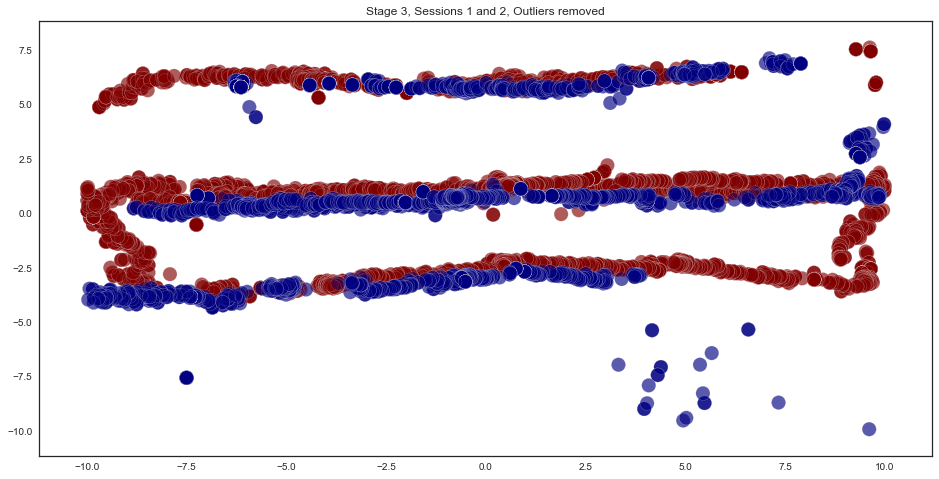

In [24]:
n = 10
data = df[df.stage==3]
data = data[((data.gpu_x<n)&(data.gpu_x>-n))&((data.gpu_y<n)&(data.gpu_y>-n))]
myzip = df.session.unique()
colors = ("green", "blue", 'red')
 
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
 
for dat, color in zip(myzip, colors):
    x = data['gpu_x']
    y = data['gpu_y']
    ax.scatter(x, y, alpha=0.4, c=data['session'], edgecolors='w', s=200, cmap='jet_r')
 
plt.title('Stage 3, Sessions 1 and 2, Outliers removed');
# plt.legend(loc=1)
#plt.savefig('all_in_one.png', format='png', dpi=300);

### 3D

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#### Stage 0, 3D

<IPython.core.display.Javascript object>


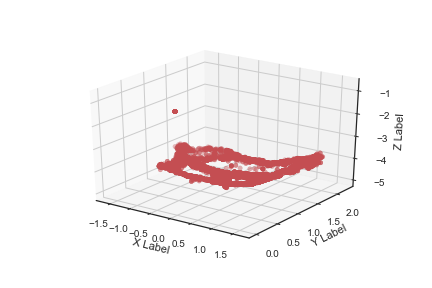

In [34]:
%matplotlib nbagg

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df[df.stage==0].gpu_x
y = df[df.stage==0].gpu_y
z = df[df.stage==0].gpu_z


ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

#### 3D: Stage 3, Sessions 1 and 2, Outliers removed

<IPython.core.display.Javascript object>


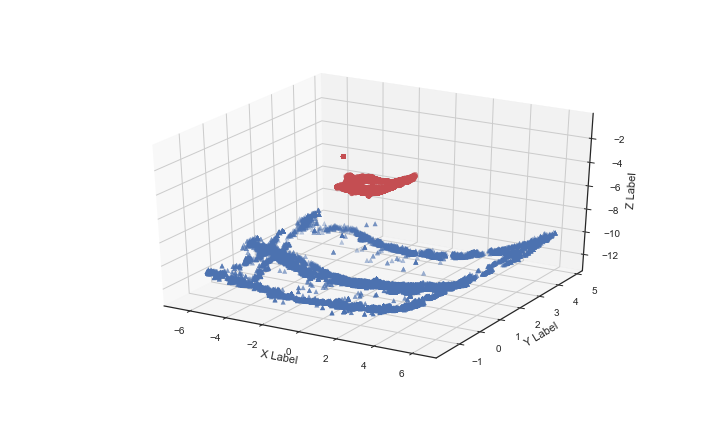

In [35]:
#matplotlib notebook
%matplotlib nbagg
#matplotlib inline

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

xs = df[df.stage==0].gpu_x
ys = df[df.stage==0].gpu_y
zs = df[df.stage==0].gpu_z

xt = df[(df.stage==2)&((df.gpu_x<n)&(df.gpu_x>-n))&((df.gpu_y<n)&(df.gpu_y>-n))].gpu_x
yt = df[(df.stage==2)&((df.gpu_x<n)&(df.gpu_x>-n))&((df.gpu_y<n)&(df.gpu_y>-n))].gpu_y
zt = df[(df.stage==2)&((df.gpu_x<n)&(df.gpu_x>-n))&((df.gpu_y<n)&(df.gpu_y>-n))].gpu_z

ax.scatter(xs, ys, zs, c='r', marker='o')
ax.scatter(xt, yt, zt, c='b', marker='^')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

<IPython.core.display.Javascript object>


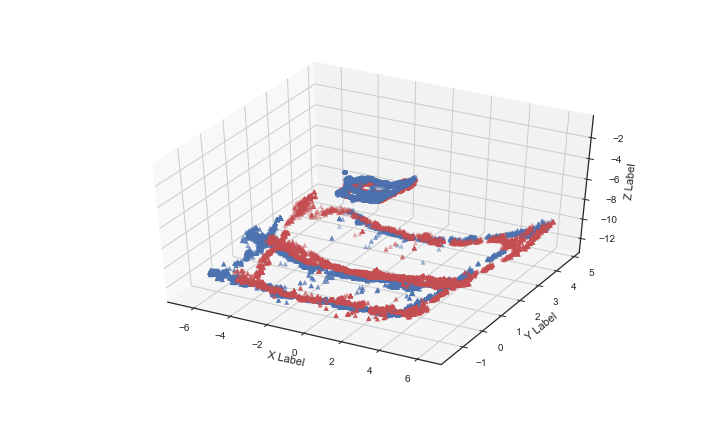

In [36]:
#matplotlib notebook
%matplotlib nbagg
#matplotlib inline

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

xs = df[(df.stage==0)&(df.session==1)].gpu_x
ys = df[(df.stage==0)&(df.session==1)].gpu_y
zs = df[(df.stage==0)&(df.session==1)].gpu_z
xs2 = df[(df.stage==0)&(df.session==2)].gpu_x
ys2 = df[(df.stage==0)&(df.session==2)].gpu_y
zs2 = df[(df.stage==0)&(df.session==2)].gpu_z

xt = df[(df.stage==2)&((df.gpu_x<n)&(df.gpu_x>-n))&((df.gpu_y<n)&(df.gpu_y>-n))&(df.session==1)].gpu_x
yt = df[(df.stage==2)&((df.gpu_x<n)&(df.gpu_x>-n))&((df.gpu_y<n)&(df.gpu_y>-n))&(df.session==1)].gpu_y
zt = df[(df.stage==2)&((df.gpu_x<n)&(df.gpu_x>-n))&((df.gpu_y<n)&(df.gpu_y>-n))&(df.session==1)].gpu_z
xt2 = df[(df.stage==2)&((df.gpu_x<n)&(df.gpu_x>-n))&((df.gpu_y<n)&(df.gpu_y>-n))&(df.session==2)].gpu_x
yt2 = df[(df.stage==2)&((df.gpu_x<n)&(df.gpu_x>-n))&((df.gpu_y<n)&(df.gpu_y>-n))&(df.session==2)].gpu_y
zt2 = df[(df.stage==2)&((df.gpu_x<n)&(df.gpu_x>-n))&((df.gpu_y<n)&(df.gpu_y>-n))&(df.session==2)].gpu_z


ax.scatter(xs, ys, zs, c='r', marker='o')
ax.scatter(xs2, ys2, zs2, c='b', marker='o')
ax.scatter(xt, yt, zt, c='r', marker='^')
ax.scatter(xt2, yt2, zt2, c='b', marker='^')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [37]:
df[(df.gpu_x!=0)&(df.gpu_y!=0)].head()

,gpu_x,gpu_y,gpu_z,stage,type,session,gpu_nz
130,0.048699,1.149491,-4.557,0.0,2.0,1.0,0.917646
131,0.048699,1.149491,-4.557,0.0,2.0,1.0,0.917646
132,0.048699,1.149491,-4.557,0.0,2.0,1.0,0.917646
133,0.048699,1.149491,-4.557,0.0,2.0,1.0,0.917646
134,0.052369,1.152610,-4.557,0.0,2.0,1.0,0.917646


In [30]:
minmax = lambda x: (x - x.min()) / (x.max() - x.min())
# dfs = standardise(df, featcols, groupby, zscore)


dfs = df.copy()
n = 10
dfs=dfs[(dfs.gpu_x!=0)&(dfs.gpu_y!=0)]
dfs = dfs[(dfs.gpu_x<n)&(dfs.gpu_x>-n)&(dfs.gpu_y<n)&(dfs.gpu_y>-n)]

featcols=['gpu_x','gpu_y']
# new subject level standardized dataframe
dfs[featcols] = dfs[featcols].groupby([dfs.stage]).transform(minmax)

In [31]:
df.gpu_x.max(), dfs.gpu_x.max()

(171.69759999999999, 1.0)

#### 3D: Stage 3, Sessions 1 and 2, Outliers removed, Minmax scaled

<IPython.core.display.Javascript object>


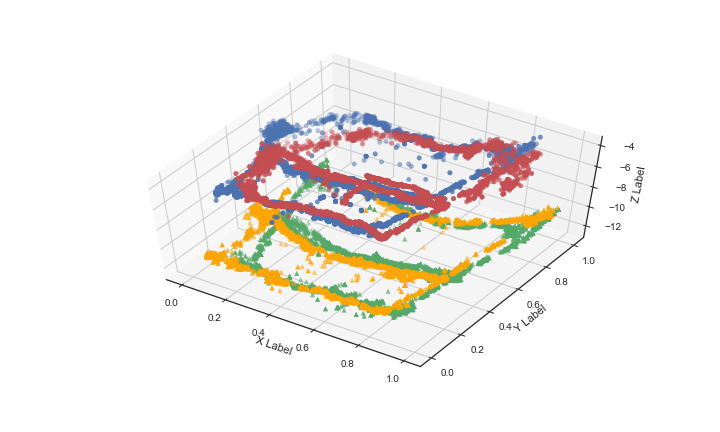

In [38]:
#matplotlib notebook
%matplotlib nbagg
#matplotlib inline

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

xs = dfs[(dfs.stage==0)&(dfs.session==1)].gpu_x
ys = dfs[(dfs.stage==0)&(dfs.session==1)].gpu_y
zs = dfs[(dfs.stage==0)&(dfs.session==1)].gpu_z
xs2 = dfs[(dfs.stage==0)&(dfs.session==2)].gpu_x
ys2 = dfs[(dfs.stage==0)&(dfs.session==2)].gpu_y
zs2 = dfs[(dfs.stage==0)&(dfs.session==2)].gpu_z

xt = dfs[(dfs.stage==2)&((dfs.gpu_x<n)&(dfs.gpu_x>-n))&((dfs.gpu_y<n)&(dfs.gpu_y>-n))&(dfs.session==1)].gpu_x
yt = dfs[(dfs.stage==2)&((dfs.gpu_x<n)&(dfs.gpu_x>-n))&((dfs.gpu_y<n)&(dfs.gpu_y>-n))&(dfs.session==1)].gpu_y
zt = dfs[(dfs.stage==2)&((dfs.gpu_x<n)&(dfs.gpu_x>-n))&((dfs.gpu_y<n)&(dfs.gpu_y>-n))&(dfs.session==1)].gpu_z
xt2 = dfs[(dfs.stage==2)&((dfs.gpu_x<n)&(dfs.gpu_x>-n))&((dfs.gpu_y<n)&(dfs.gpu_y>-n))&(dfs.session==2)].gpu_x
yt2 = dfs[(dfs.stage==2)&((dfs.gpu_x<n)&(dfs.gpu_x>-n))&((dfs.gpu_y<n)&(dfs.gpu_y>-n))&(dfs.session==2)].gpu_y
zt2 = dfs[(dfs.stage==2)&((dfs.gpu_x<n)&(dfs.gpu_x>-n))&((dfs.gpu_y<n)&(dfs.gpu_y>-n))&(dfs.session==2)].gpu_z


ax.scatter(xs, ys, zs, c='r', marker='o')
ax.scatter(xs2, ys2, zs2, c='b', marker='o')
ax.scatter(xt, yt, zt, c='g', marker='^')
ax.scatter(xt2, yt2, zt2, c='orange', marker='^')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

<IPython.core.display.Javascript object>


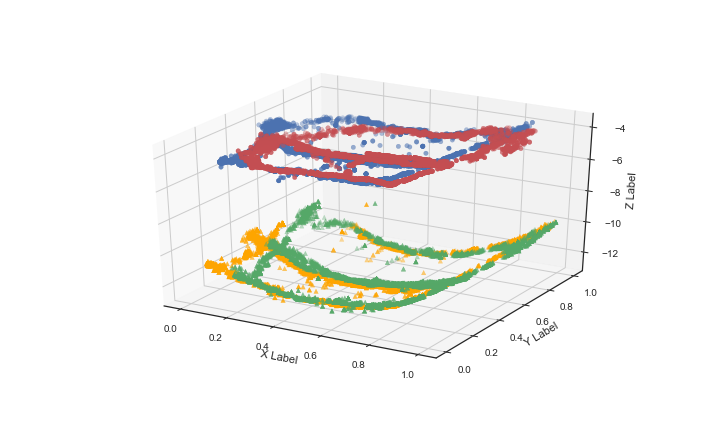

In [33]:
#matplotlib notebook
%matplotlib nbagg
#matplotlib inline

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

xs = dfs[(dfs.stage==0)&(dfs.session==1)].gpu_x
ys = dfs[(dfs.stage==0)&(dfs.session==1)].gpu_y
zs = dfs[(dfs.stage==0)&(dfs.session==1)].gpu_z
xs2 = dfs[(dfs.stage==0)&(dfs.session==2)].gpu_x
ys2 = dfs[(dfs.stage==0)&(dfs.session==2)].gpu_y
zs2 = dfs[(dfs.stage==0)&(dfs.session==2)].gpu_z

xt = dfs[(dfs.stage==2)&((dfs.gpu_x<n)&(dfs.gpu_x>-n))&((dfs.gpu_y<n)&(dfs.gpu_y>-n))&(dfs.session==1)].gpu_x
yt = dfs[(dfs.stage==2)&((dfs.gpu_x<n)&(dfs.gpu_x>-n))&((dfs.gpu_y<n)&(dfs.gpu_y>-n))&(dfs.session==1)].gpu_y
zt = dfs[(dfs.stage==2)&((dfs.gpu_x<n)&(dfs.gpu_x>-n))&((dfs.gpu_y<n)&(dfs.gpu_y>-n))&(dfs.session==1)].gpu_z
xt2 = dfs[(dfs.stage==2)&((dfs.gpu_x<n)&(dfs.gpu_x>-n))&((dfs.gpu_y<n)&(dfs.gpu_y>-n))&(dfs.session==2)].gpu_x
yt2 = dfs[(dfs.stage==2)&((dfs.gpu_x<n)&(dfs.gpu_x>-n))&((dfs.gpu_y<n)&(dfs.gpu_y>-n))&(dfs.session==2)].gpu_y
zt2 = dfs[(dfs.stage==2)&((dfs.gpu_x<n)&(dfs.gpu_x>-n))&((dfs.gpu_y<n)&(dfs.gpu_y>-n))&(dfs.session==2)].gpu_z


ax.scatter(xs, ys, zs, c='r', marker='o')
ax.scatter(xs2, ys2, zs2, c='b', marker='o')
ax.scatter(xt, yt, zt, c='g', marker='^')
ax.scatter(xt2, yt2, zt2, c='orange', marker='^')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

### Outlier removed based on z label value

In [39]:
minmax = lambda x: (x - x.min()) / (x.max() - x.min())
# dfs = standardise(df, featcols, groupby, zscore)


dfs = df.copy()
n = 10
dfs=dfs[(dfs.gpu_x!=0)&(dfs.gpu_y!=0)]
dfs = dfs[dfs.gpu_z>-25]

featcols=['gpu_x','gpu_y']
# new subject level standardized dataframe
dfs[featcols] = dfs[featcols].groupby([dfs.stage]).transform(minmax)

<IPython.core.display.Javascript object>


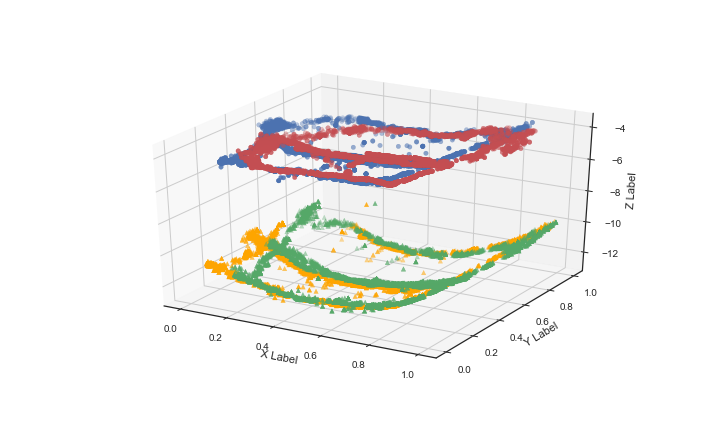

In [43]:
#matplotlib notebook
%matplotlib nbagg
#matplotlib inline

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

xs = dfs[(dfs.stage==0)&(dfs.session==1)].gpu_x
ys = dfs[(dfs.stage==0)&(dfs.session==1)].gpu_y
zs = dfs[(dfs.stage==0)&(dfs.session==1)].gpu_z
xs2 = dfs[(dfs.stage==0)&(dfs.session==2)].gpu_x
ys2 = dfs[(dfs.stage==0)&(dfs.session==2)].gpu_y
zs2 = dfs[(dfs.stage==0)&(dfs.session==2)].gpu_z

xt = dfs[(dfs.stage==2)&(dfs.session==1)].gpu_x
yt = dfs[(dfs.stage==2)&(dfs.session==1)].gpu_y
zt = dfs[(dfs.stage==2)&(dfs.session==1)].gpu_z
xt2 = dfs[(dfs.stage==2)&(dfs.session==2)].gpu_x
yt2 = dfs[(dfs.stage==2)&(dfs.session==2)].gpu_y
zt2 = dfs[(dfs.stage==2)&(dfs.session==2)].gpu_z


ax.scatter(xs, ys, zs, c='r', marker='o')
ax.scatter(xs2, ys2, zs2, c='b', marker='o')
ax.scatter(xt, yt, zt, c='g', marker='^')
ax.scatter(xt2, yt2, zt2, c='orange', marker='^')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()